In [1]:
class Vertex:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x  # Horizontal position of the bar (vertex)
        self.y = y  # Vertical position of the bar

class Edge:
    def __init__(self, src, dest):
        self.src = src
        self.dest = dest

class Graph:
    def __init__(self, vertices):
        self.vertices = {v.id: v for v in vertices}
        self.edges = []

    def add_edge(self, src_id, dest_id):
        if src_id in self.vertices and dest_id in self.vertices:
            self.edges.append(Edge(self.vertices[src_id], self.vertices[dest_id]))

    def find_placement(self):
        # Initial naive placement of edges
        for edge in self.edges:
            # Calculate initial potential crossings
            min_y = min(edge.src.y, edge.dest.y)
            max_y = max(edge.src.y, edge.dest.y)
            edge.crossings = [(min_y, max_y)]
        
        # Attempt to minimize crossings
        for edge in self.edges:
            crossings = 0
            for other_edge in self.edges:
                if edge != other_edge:
                    if (other_edge.src.y < edge.src.y < other_edge.dest.y or 
                        other_edge.src.y < edge.dest.y < other_edge.dest.y):
                        crossings += 1
            # If crossings more than 2, attempt to adjust position (simplified)
            if crossings > 2:
                print(f"Edge ({edge.src.id}, {edge.dest.id}) has {crossings} crossings, adjusting...")
                # This part is very simplified, in reality more complex logic is needed
                edge.src.y += 1  # Moving src up to reduce crossings
                edge.dest.y += 1  # Moving dest up to reduce crossings

    def display(self):
        for edge in self.edges:
            print(f"Edge from {edge.src.id} to {edge.dest.id} crosses between heights {edge.src.y} and {edge.dest.y}")

# Example usage
vertices = [Vertex(i, 0, i*10) for i in range(5)]  # 5 vertices positioned at different y levels
graph = Graph(vertices)
graph.add_edge(0, 1)
graph.add_edge(1, 2)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(0, 4)
graph.add_edge(1, 3)

graph.find_placement()
graph.display()


Edge from 0 to 1 crosses between heights 0 and 10
Edge from 1 to 2 crosses between heights 10 and 20
Edge from 2 to 3 crosses between heights 20 and 30
Edge from 3 to 4 crosses between heights 30 and 40
Edge from 0 to 4 crosses between heights 0 and 40
Edge from 1 to 3 crosses between heights 10 and 30


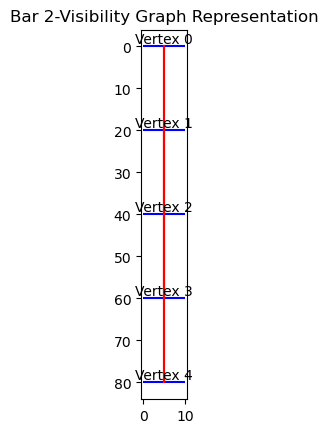

In [2]:
import matplotlib.pyplot as plt

class Vertex:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x  # Horizontal position of the bar (vertex)
        self.y = y  # Vertical position of the bar

class Edge:
    def __init__(self, src, dest):
        self.src = src
        self.dest = dest

class Graph:
    def __init__(self, vertices):
        self.vertices = {v.id: v for v in vertices}
        self.edges = []

    def add_edge(self, src_id, dest_id):
        if src_id in self.vertices and dest_id in self.vertices:
            self.edges.append(Edge(self.vertices[src_id], self.vertices[dest_id]))

    def plot_graph(self):
        fig, ax = plt.subplots()
        # Plot each vertex as a horizontal line
        for v in self.vertices.values():
            ax.hlines(y=v.y, xmin=v.x, xmax=v.x+10, color='blue')
            ax.text(v.x+5, v.y, f'Vertex {v.id}', verticalalignment='bottom', horizontalalignment='center')

        # Plot each edge as a vertical line between vertices
        for edge in self.edges:
            ax.plot([edge.src.x+5, edge.dest.x+5], [edge.src.y, edge.dest.y], color='red')

        plt.title('Bar 2-Visibility Graph Representation')
        ax.set_aspect('equal')
        plt.gca().invert_yaxis()  # Invert y axis to match typical graph drawing
        plt.show()

# Example usage
vertices = [Vertex(i, 0, i*20) for i in range(5)]  # 5 vertices positioned at different y levels
graph = Graph(vertices)
graph.add_edge(0, 1)
graph.add_edge(1, 2)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(0, 4)
graph.add_edge(1, 3)

graph.plot_graph()


In [3]:
!pip install matplotlib networkx


Defaulting to user installation because normal site-packages is not writeable


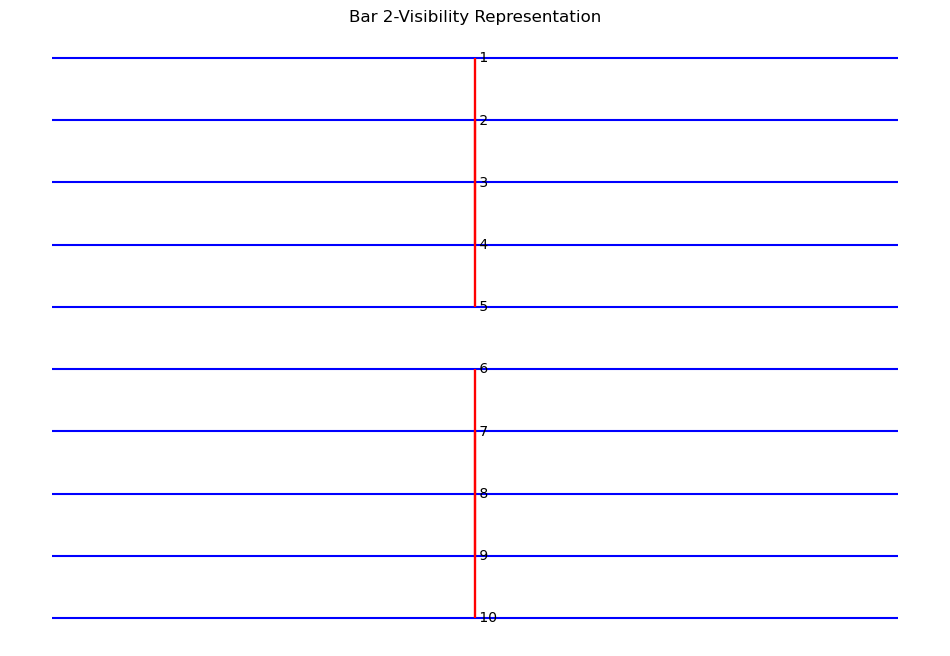

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_2_planar_graph():
    G = nx.Graph()
    # Add edges based on the 2-planar graph's structure (example structure)
    edges = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (1, 5), (2, 5), (3, 5),
             (6, 7), (6, 8), (7, 8), (6, 9), (7, 9), (8, 9), (9, 10), (8, 10), (7, 10), (6, 10)]
    G.add_edges_from(edges)
    return G

def draw_bar_2_visibility(G):
    pos = nx.spring_layout(G, iterations=50)  # Use spring layout to position the graph
    plt.figure(figsize=(12, 8))
    
    # Compute horizontal positions and bar levels
    y_values = np.linspace(0, 1, len(G.nodes()))
    horizontal_positions = {node: (0.5, y) for node, y in zip(G.nodes(), y_values)}

    # Draw nodes as horizontal lines
    for node, (x, y) in horizontal_positions.items():
        plt.hlines(y, x - 0.05, x + 0.05, colors='blue', label=f'Node {node}')
        plt.text(x, y, f' {node}', verticalalignment='center')

    # Draw edges as vertical lines, checking crossing constraints
    for edge in G.edges():
        n1, n2 = edge
        y1, y2 = horizontal_positions[n1][1], horizontal_positions[n2][1]
        x = (horizontal_positions[n1][0] + horizontal_positions[n2][0]) / 2
        plt.vlines(x, y1, y2, colors='red')

    plt.gca().invert_yaxis()  # Invert y-axis to better match typical graph drawings
    plt.axis('off')
    plt.title('Bar 2-Visibility Representation')
    plt.show()

# Create the graph and draw it
G = create_2_planar_graph()
draw_bar_2_visibility(G)
